Load the testing data (Unseen data)

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import numpy
from sklearn import metrics
from sklearn import datasets

import sys
sys.path.append("./iris")
plt.rcParams['figure.figsize'] = (15, 10)

Using TensorFlow backend.


# Load the Data

In [2]:
X_train = np.load('./heart/X_train.npy')
y_train = np.load('./heart/y_train.npy')
X_test = np.load('./heart/X_test.npy')
y_test = np.load('./heart/y_test.npy')
X_deploy = np.load('./heart/X_deploy.npy')
y_deploy = np.load('./heart/y_deploy.npy')

print 'Number of training examples',len(X_train)
print 'Number of validation examples',len(X_test)
print 'Number of testing examples',len(X_deploy)

Number of training examples 191
Number of validation examples 48
Number of testing examples 60


# Initialize the classifiers as the training time


In [3]:
from sklearn.neighbors import KNeighborsClassifier
clf_neigh = KNeighborsClassifier(n_neighbors=5)
clf_neigh.fit(X_train, y_train)
from sklearn.svm import LinearSVC
clf_svm_linear = LinearSVC(C=20.0)
clf_svm_linear.fit(X_train, y_train)
from sklearn.svm import SVC
clf_svm = SVC(C=5.0, kernel='rbf')
clf_svm.fit(X_train, y_train)
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(min_samples_split=2)
clf_dt.fit(X_train, y_train)
from sklearn.tree import DecisionTreeClassifier
clf_dt_IG = DecisionTreeClassifier(criterion='entropy', min_samples_split=2)
clf_dt_IG.fit(X_train, y_train)
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
clf_dt_BGKN = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                             max_samples=0.5, max_features=0.5)
clf_dt_BGKN.fit(X_train, y_train)
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
clf_dt_BGDT = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', min_samples_split=2),
                             max_samples=0.5, max_features=0.5)
clf_dt_BGDT.fit(X_train, y_train)
from sklearn.ensemble import RandomForestClassifier
clf_dt_RF = RandomForestClassifier()
#Training
start_time = time.time()
clf_dt_RF.fit(X_train, y_train)
from sklearn.ensemble import AdaBoostClassifier
clf_dt_AD = AdaBoostClassifier()
clf_dt_AD.fit(X_train, y_train)
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_dt_LDA = LinearDiscriminantAnalysis()
clf_dt_LDA.fit(X_train, y_train)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf_dt_QDA = QuadraticDiscriminantAnalysis()
clf_dt_QDA.fit(X_train, y_train)

/Users/salemameen/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/salemameen/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

In [4]:
import numpy as np
from numpy import *
from sklearn.cross_validation import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2

from keras.utils import np_utils

labelsTrain = np_utils.to_categorical(y_train)
labelsTest = np_utils.to_categorical(y_test) 
labelsDepy = np_utils.to_categorical(y_deploy)                                              
                                             
model = Sequential()
model.add(Dense(35,
                input_shape=(13,), 
                activation="relu"))
#model.add(Dropout(0.5))
model.add(Dense(5, activation="softmax"))
model.load_weights('/Users/salemameen/Desktop/banditsbook/python_heart/CARModelbest.hdf5')
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

/Users/salemameen/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/keras/utils/np_utils.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Y = np.zeros((len(y), nb_classes))
/Users/salemameen/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/keras/utils/np_utils.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Y[i, y[i]] = 1.


In [5]:
# MAB_NN(14.3%REMOVED) MODEL1    5               
model1 = Sequential()
model1.add(Dense(35,
                input_shape=(13,), 
                activation="relu"))
#model.add(Dropout(0.5))
model1.add(Dense(5, activation="softmax"))
model1.load_weights('/Users/salemameen/Desktop/banditsbook/python_heart/IrisUCB1/spam4.hdf5')
model1.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [6]:
# MAB_NN(28.6%REMOVED) MODEL2 10
model2 = Sequential()
model2.add(Dense(35,
                input_shape=(13,), 
                activation="relu"))
#model.add(Dropout(0.5))
model2.add(Dense(5, activation="softmax"))
model2.load_weights('/Users/salemameen/Desktop/banditsbook/python_heart/IrisUCB1/spam9.hdf5')
model2.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [7]:
# MAB_NN(82.9%REMOVED) MODEL3 29
model3 = Sequential()
model3.add(Dense(35,
                input_shape=(13,), 
                activation="relu"))
#model.add(Dropout(0.5))
model3.add(Dense(5, activation="softmax"))
model3.load_weights('/Users/salemameen/Desktop/banditsbook/python_heart/IrisUCB1/spam28.hdf5')
model3.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

## Deployment Time

In [8]:
start_time = time.time()
y_pred_neigh = clf_neigh.predict(X_deploy)
print("The time of KNN is           %s seconds" % (time.time() - start_time))
# Linear SVM 
start_time = time.time()
y_pred_svm_linear = clf_svm_linear.predict(X_deploy)
print("The time of LSVM is          %s seconds " % (time.time() - start_time))
# SVM kernel='rbf'
start_time = time.time()
y_pred_svm = clf_svm.predict(X_deploy)
print("The time of SVM is           %s seconds " % (time.time() - start_time))
# DT with gini
start_time = time.time()
y_pred_gtgini = clf_dt.predict(X_deploy)
print("The time of DT_gini is       %s seconds " % (time.time() - start_time))
# DT with entorpy
start_time = time.time()
y_pred_dt_IG = clf_dt_IG.predict(X_deploy)
print("The time of DT is            %s seconds" % (time.time() - start_time))
# Bagging with Knn
start_time = time.time()
y_pred_dt_BGKN = clf_dt_BGKN.predict(X_deploy)
print("The time of Bagging Knn is   %s seconds" % (time.time() - start_time))
# Bagging with DT with gini
start_time = time.time()
y_pred_dt_BGDT = clf_dt_BGDT.predict(X_deploy)
print("The time of Bagging DT is    %s seconds " % (time.time() - start_time))
# Random Forest with DT with gini
start_time = time.time()
y_pred_dt_RF = clf_dt_RF.predict(X_deploy)
print("The time of Random Forest is %s seconds " % (time.time() - start_time))
# Ada Boost
start_time = time.time()
y_pred_dt_AD = clf_dt_AD.predict(X_deploy)
print("The time of Ada Boost is     %s seconds " % (time.time() - start_time))
# Naive Bayes
start_time = time.time()
y_pred_NB = clf_NB.predict(X_deploy)
print("The time of Naive Bayes is   %s seconds " % (time.time() - start_time))
# LDA
start_time = time.time()
y_pred_dt_LDA = clf_dt_LDA.predict(X_deploy)
print("The time of LDA is           %s seconds " % (time.time() - start_time))
# QDA
start_time = time.time()
y_pred_dt_QDA = clf_dt_QDA.predict(X_deploy)
print("The time of QDA is           %s seconds " % (time.time() - start_time))
# NN
start_time = time.time()
y_pred_NN = model.predict_classes(X_deploy)
print("The time of NN is            %s seconds " % (time.time() - start_time))
# NN 8% removed neurals
start_time = time.time()
y_pred_NN1 = model1.predict_classes(X_deploy)
print("The time of NN14.3 Removed is %s seconds " % (time.time() - start_time))
# NN 36% removed neurals
start_time = time.time()
y_pred_NN2 = model2.predict_classes(X_deploy)
print("The time of NN28.6 Removed is %s seconds " % (time.time() - start_time))
# NN 84% removed neurals
start_time = time.time()
y_pred_NN3 = model3.predict_classes(X_deploy)
print("The time of NN82.9 Removed is  %s seconds " % (time.time() - start_time))

The time of KNN is           0.000888824462891 seconds
The time of LSVM is          0.000242948532104 seconds 
The time of SVM is           0.000452995300293 seconds 
The time of DT_gini is       0.000137090682983 seconds 
The time of DT is            0.000120162963867 seconds
The time of Bagging Knn is   0.00354599952698 seconds
The time of Bagging DT is    0.000769138336182 seconds 
The time of Random Forest is 0.00068998336792 seconds 
The time of Ada Boost is     0.00334191322327 seconds 
The time of Naive Bayes is   0.000263929367065 seconds 
The time of LDA is           0.000121116638184 seconds 
The time of QDA is           0.000267028808594 seconds 
32/60 [===============>..............] - ETA: 0sThe time of NN82.9 Removed is  0.00844287872314 seconds 


# Accuracy of the models on Testing data

In [9]:
print "The accuracy of KNN:          \t", metrics.accuracy_score(y_deploy, y_pred_neigh)
print "The accuracy of LSVM:         \t", metrics.accuracy_score(y_deploy, y_pred_svm_linear)
print "The accuracy of SVM:          \t", metrics.accuracy_score(y_deploy, y_pred_svm)
print "The accuracy of DT_gini:      \t", metrics.accuracy_score(y_deploy, y_pred_gtgini)
print "The accuracy of DT_entorpy:   \t", metrics.accuracy_score(y_deploy, y_pred_dt_IG)
print "The accuracy of Bagging Knn:  \t", metrics.accuracy_score(y_deploy, y_pred_dt_BGKN)
print "The accuracy of Bagging DT:   \t", metrics.accuracy_score(y_deploy, y_pred_dt_BGDT)
print "The accuracy of Random Forest:\t", metrics.accuracy_score(y_deploy, y_pred_dt_RF)
print "The accuracy of Ada Boost:    \t", metrics.accuracy_score(y_deploy, y_pred_dt_AD)
print "The accuracy of Naive Bayes:  \t", metrics.accuracy_score(y_deploy, y_pred_NB)
print "The accuracy of LDA:          \t", metrics.accuracy_score(y_deploy, y_pred_dt_LDA)
print "The accuracy of QDA:          \t", metrics.accuracy_score(y_deploy, y_pred_dt_QDA)
print "The accuracy of NN:           \t", metrics.accuracy_score(y_deploy, y_pred_NN)
print "The accuracy of NN14.3R:      \t", metrics.accuracy_score(y_deploy, y_pred_NN1)
print "The accuracy of NN28.6R:      \t", metrics.accuracy_score(y_deploy, y_pred_NN2)
print "The accuracy of NN82.9R:      \t", metrics.accuracy_score(y_deploy, y_pred_NN3)

The accuracy of KNN:          	0.566666666667
The accuracy of LSVM:         	0.533333333333
The accuracy of SVM:          	0.6
The accuracy of DT_gini:      	0.483333333333
The accuracy of DT_entorpy:   	0.516666666667
The accuracy of Bagging Knn:  	0.516666666667
The accuracy of Bagging DT:   	0.533333333333
The accuracy of Random Forest:	0.5
The accuracy of Ada Boost:    	0.533333333333
The accuracy of Naive Bayes:  	0.366666666667
The accuracy of LDA:          	0.55
The accuracy of QDA:          	0.433333333333
The accuracy of NN:           	0.55
The accuracy of NN14.3R:      	0.616666666667
The accuracy of NN28.6R:      	0.616666666667
The accuracy of NN82.9R:      	0.55


# Precision of the models on Testing data

In [10]:
print "Precision of KNN:          \t", metrics.precision_score(y_deploy, y_pred_neigh, average="macro")
print "Precision of LSVM:         \t", metrics.precision_score(y_deploy, y_pred_svm_linear, average="macro")
print "Precision of SVM:          \t", metrics.precision_score(y_deploy, y_pred_svm, average="macro")
print "Precision of DT_gini:      \t", metrics.precision_score(y_deploy, y_pred_gtgini, average="macro")
print "Precision of DT_entorpy:   \t", metrics.precision_score(y_deploy, y_pred_dt_IG, average="macro")
print "Precision Bagging Knn:     \t", metrics.precision_score(y_deploy, y_pred_dt_BGKN, average="macro")
print "Precision of Bagging DT:   \t", metrics.precision_score(y_deploy, y_pred_dt_BGDT, average="macro")
print "Precision of Random Forest:\t", metrics.precision_score(y_deploy, y_pred_dt_RF, average="macro")
print "Precision of Ada Boost:    \t", metrics.precision_score(y_deploy, y_pred_dt_AD, average="macro")
print "Precision of Naive Bayes:  \t", metrics.precision_score(y_deploy, y_pred_NB, average="macro")
print "Precision of LDA:          \t", metrics.precision_score(y_deploy, y_pred_dt_LDA, average="macro")
print "Precision of QDA:          \t", metrics.precision_score(y_deploy, y_pred_dt_QDA, average="macro")
print "Precision dataset of NN:   \t", metrics.precision_score(y_deploy, y_pred_NN, average="macro")
print "Precision of NN8R:         \t", metrics.precision_score(y_deploy, y_pred_NN1, average="macro")
print "Precision of NN36R:        \t", metrics.precision_score(y_deploy, y_pred_NN2, average="macro")
print "Precision of NN84R:        \t", metrics.precision_score(y_deploy, y_pred_NN3, average="macro")


Precision of KNN:          	0.395238095238
Precision of LSVM:         	0.393939393939
Precision of SVM:          	0.417142857143
Precision of DT_gini:      	0.313865546218
Precision of DT_entorpy:   	0.47639027639
Precision Bagging Knn:     	0.297720364742
Precision of Bagging DT:   	0.361739130435
Precision of Random Forest:	0.233972125436
Precision of Ada Boost:    	0.288345864662
Precision of Naive Bayes:  	0.180555555556
Precision of LDA:          	0.354517374517
Precision of QDA:          	0.21380952381
Precision dataset of NN:   	0.44013880856
Precision of NN8R:         	0.484065934066
Precision of NN36R:        	0.485873015873
Precision of NN84R:        	0.393495934959


/Users/salemameen/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Recall of the models on Testing data

In [11]:
print "Recall of KNN :         \t", metrics.recall_score(y_deploy, y_pred_neigh, average="macro")
print "Recall of LSVM :        \t", metrics.recall_score(y_deploy, y_pred_svm_linear, average="macro")
print "Recall of SVM :         \t", metrics.recall_score(y_deploy, y_pred_svm, average="macro")
print "Recall of DT_gini :     \t", metrics.recall_score(y_deploy, y_pred_gtgini, average="macro")
print "Recall of DT_entorpy:   \t", metrics.recall_score(y_deploy, y_pred_dt_IG, average="macro")
print "Recall of Bagging Knn : \t", metrics.recall_score(y_deploy, y_pred_dt_BGKN, average="macro")
print "Recall of Bagging DT :  \t", metrics.recall_score(y_deploy, y_pred_dt_BGDT, average="macro")
print "Recall of Random Forest:\t", metrics.recall_score(y_deploy, y_pred_dt_RF, average="macro")
print "Recall of Ada Boost :   \t", metrics.recall_score(y_deploy, y_pred_dt_AD, average="macro")
print "Recall of Naive Bayes : \t", metrics.recall_score(y_deploy, y_pred_NB, average="macro")
print "Recall of LDA :         \t", metrics.recall_score(y_deploy, y_pred_dt_LDA, average="macro")
print "Recall of QDA :         \t", metrics.recall_score(y_deploy, y_pred_dt_QDA, average="macro")
print "Recall of NN :          \t", metrics.recall_score(y_deploy, y_pred_NN, average="macro")
print "Recall of NN14.3R:      \t", metrics.recall_score(y_deploy, y_pred_NN1, average="macro")
print "Recall of NN28.6R:      \t", metrics.recall_score(y_deploy, y_pred_NN2, average="macro")
print "Recall of NN82.9R:      \t", metrics.recall_score(y_deploy, y_pred_NN3, average="macro")


Recall of KNN :         	0.325095785441
Recall of LSVM :        	0.265325670498
Recall of SVM :         	0.358429118774
Recall of DT_gini :     	0.275287356322
Recall of DT_entorpy:   	0.314176245211
Recall of Bagging Knn : 	0.254214559387
Recall of Bagging DT :  	0.270881226054
Recall of Random Forest:	0.257088122605
Recall of Ada Boost :   	0.315517241379
Recall of Naive Bayes : 	0.161494252874
Recall of LDA :         	0.297318007663
Recall of QDA :         	0.239272030651
Recall of NN :          	0.318199233716
Recall of NN14.3R:      	0.411302681992
Recall of NN28.6R:      	0.395977011494
Recall of NN82.9R:      	0.30153256705


# F1 score of the models on Testing data

In [12]:
print "F1 score of KNN:          \t", metrics.f1_score(y_deploy, y_pred_neigh, average="macro")
print "F1 score of LSVM:         \t", metrics.f1_score(y_deploy, y_pred_svm_linear, average="macro")
print "F1 score of SVM:          \t", metrics.f1_score(y_deploy, y_pred_svm, average="macro")
print "F1 score of DT_gini:      \t", metrics.f1_score(y_deploy, y_pred_gtgini, average="macro")
print "F1 score of DT_entorpy:   \t", metrics.f1_score(y_deploy, y_pred_dt_IG, average="macro")
print "F1 score of Bagging Knn:  \t", metrics.f1_score(y_deploy, y_pred_dt_BGKN, average="macro")
print "F1 score of Bagging DT:   \t", metrics.f1_score(y_deploy, y_pred_dt_BGDT, average="macro")
print "F1 score of Random Forest:\t", metrics.f1_score(y_deploy, y_pred_dt_RF, average="macro")
print "F1 score of Ada Boost:    \t", metrics.f1_score(y_deploy, y_pred_dt_AD, average="macro")
print "F1 score of Naive Bayes:  \t", metrics.f1_score(y_deploy, y_pred_NB, average="macro")
print "F1 score of LDA:          \t", metrics.f1_score(y_deploy, y_pred_dt_LDA, average="macro")
print "F1 score of QDA:          \t", metrics.f1_score(y_deploy, y_pred_dt_QDA, average="macro")
print "F1 score of NN:           \t", metrics.f1_score(y_deploy, y_pred_NN, average="macro")
print "F1 score of NN14.3R:      \t", metrics.f1_score(y_deploy, y_pred_NN1, average="macro")
print "F1 score of NN28.6R:      \t", metrics.f1_score(y_deploy, y_pred_NN2, average="macro")
print "F1 score of NN82.9R:      \t", metrics.f1_score(y_deploy, y_pred_NN3, average="macro")


F1 score of KNN:          	0.325619169563
F1 score of LSVM:         	0.250567514677
F1 score of SVM:          	0.368060200669
F1 score of DT_gini:      	0.28257020757
F1 score of DT_entorpy:   	0.319859335038
F1 score of Bagging Knn:  	0.233732057416
F1 score of Bagging DT:   	0.258424242424
F1 score of Random Forest:	0.238571428571
F1 score of Ada Boost:    	0.296893178213
F1 score of Naive Bayes:  	0.17
F1 score of LDA:          	0.297727272727
F1 score of QDA:          	0.223675213675
F1 score of NN:           	0.325951153324
F1 score of NN14.3R:      	0.428557692308
F1 score of NN28.6R:      	0.414945054945
F1 score of NN82.9R:      	0.268571428571


/Users/salemameen/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Plot the results

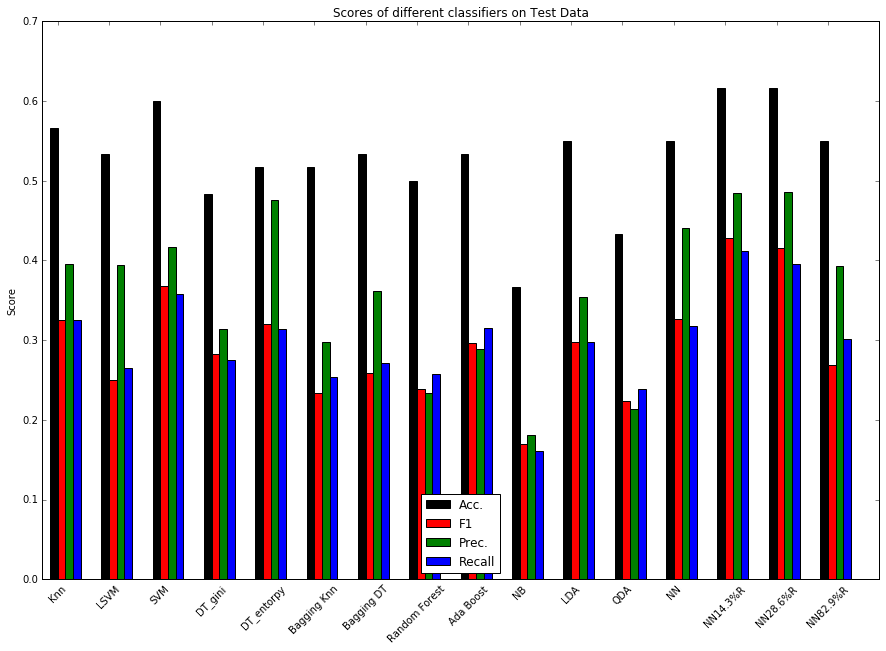

In [13]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = (15, 6)
ax = fig.add_subplot(111)
accData = [metrics.accuracy_score(y_deploy, y_pred_neigh),
           metrics.accuracy_score(y_deploy, y_pred_svm_linear), 
           metrics.accuracy_score(y_deploy, y_pred_svm), 
           metrics.accuracy_score(y_deploy, y_pred_gtgini),
           metrics.accuracy_score(y_deploy, y_pred_dt_IG), 
           metrics.accuracy_score(y_deploy, y_pred_dt_BGKN),
           metrics.accuracy_score(y_deploy, y_pred_dt_BGDT), 
           metrics.accuracy_score(y_deploy, y_pred_dt_RF),
           metrics.accuracy_score(y_deploy, y_pred_dt_AD), 
           metrics.accuracy_score(y_deploy, y_pred_NB),
           metrics.accuracy_score(y_deploy, y_pred_dt_LDA), 
           metrics.accuracy_score(y_deploy, y_pred_dt_QDA),
           metrics.accuracy_score(y_deploy, y_pred_NN),
           metrics.accuracy_score(y_deploy, y_pred_NN1),
           metrics.accuracy_score(y_deploy, y_pred_NN2),
           metrics.accuracy_score(y_deploy, y_pred_NN3)]

PresionData = [metrics.precision_score(y_deploy, y_pred_neigh, average="macro"),
               metrics.precision_score(y_deploy, y_pred_svm_linear, average="macro"),
               metrics.precision_score(y_deploy, y_pred_svm, average="macro"),
               metrics.precision_score(y_deploy, y_pred_gtgini, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_IG, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_BGKN, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_BGDT, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_RF, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_AD, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NB, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_LDA, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_QDA, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NN, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NN1, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NN2, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NN3, average="macro")]
RecallData = [ metrics.recall_score(y_deploy, y_pred_neigh, average="macro"),
              metrics.recall_score(y_deploy, y_pred_svm_linear, average="macro"),
              metrics.recall_score(y_deploy, y_pred_svm, average="macro"),
              metrics.recall_score(y_deploy, y_pred_gtgini, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_IG, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_BGKN, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_BGDT, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_RF, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_AD, average="macro"),
              metrics.recall_score(y_deploy, y_pred_NB, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_LDA, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_QDA, average="macro"),
              metrics.recall_score(y_deploy, y_pred_NN, average="macro"),
              metrics.recall_score(y_deploy, y_pred_NN1, average="macro"),
              metrics.recall_score(y_deploy, y_pred_NN2, average="macro"),
              metrics.recall_score(y_deploy, y_pred_NN3, average="macro")]

F1Data = [metrics.f1_score(y_deploy, y_pred_neigh, average="macro"),
          metrics.f1_score(y_deploy, y_pred_svm_linear, average="macro"),
          metrics.f1_score(y_deploy, y_pred_svm, average="macro"),
          metrics.f1_score(y_deploy, y_pred_gtgini, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_IG, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_BGKN, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_BGDT, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_RF, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_AD, average="macro"),
          metrics.f1_score(y_deploy, y_pred_NB, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_LDA, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_QDA, average="macro"),
          metrics.f1_score(y_deploy, y_pred_NN, average="macro"),
          metrics.f1_score(y_deploy, y_pred_NN1, average="macro"),
          metrics.f1_score(y_deploy, y_pred_NN2, average="macro"),
          metrics.f1_score(y_deploy, y_pred_NN3, average="macro")]
N = len(accData)
## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.15                     # the width of the bars
## the bars
rects1 = ax.bar(ind, accData, width,
                color='black',
                #yerr=menStd,
                error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = ax.bar(ind+width, F1Data, width,
                    color='red',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='black'))
rects3 = ax.bar(ind+width+width, PresionData, width,
                    color='green',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='blue'))
rects4 = ax.bar(ind+width+width+width, RecallData, width,
                    color='blue',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='green'))
# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,0.7)
ax.set_ylabel('Score')
ax.set_title('Scores of different classifiers on Test Data')
xTickMarks = ['Knn', 'LSVM', 'SVM', 'DT_gini', 'DT_entorpy' ,
              'Bagging Knn' , 'Bagging DT' , 'Random Forest' , 'Ada Boost' ,
              'NB' , 'LDA' , 'QDA' , 'NN', 'NN14.3%R' , 'NN28.6%R' , 'NN82.9%R']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)
## add a legend
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Acc.', 'F1' , 'Prec.' , 'Recall') , loc=8, shadow=True, fontsize='x-large' )
plt.show()

# Compute Confusion Matrix

In [14]:
iris = datasets.load_iris()
from sklearn.metrics import confusion_matrix
plt.rcParams['figure.figsize'] = (15, 6)
targetLabel = ['0','1','2','3','4']
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(targetLabel))
    plt.xticks(tick_marks, targetLabel)
    plt.yticks(tick_marks, targetLabel)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Compute Confusion on Knn

Confusion matrix, without normalization
[[27  2  0  0  0]
 [ 8  3  0  1  0]
 [ 4  2  3  0  0]
 [ 2  2  3  1  1]
 [ 1  0  0  0  0]]
Normalized confusion matrix
[[ 0.93  0.07  0.    0.    0.  ]
 [ 0.67  0.25  0.    0.08  0.  ]
 [ 0.44  0.22  0.33  0.    0.  ]
 [ 0.22  0.22  0.33  0.11  0.11]
 [ 1.    0.    0.    0.    0.  ]]


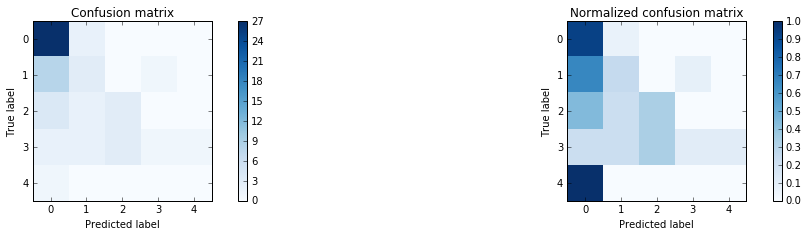

In [15]:
cm = confusion_matrix(y_deploy, y_pred_neigh)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()


## Compute Confusion on LSVM

Confusion matrix, without normalization
[[28  1  0  0  0]
 [ 9  3  0  0  0]
 [ 4  3  0  0  2]
 [ 2  2  2  1  2]
 [ 1  0  0  0  0]]
Normalized confusion matrix
[[ 0.97  0.03  0.    0.    0.  ]
 [ 0.75  0.25  0.    0.    0.  ]
 [ 0.44  0.33  0.    0.    0.22]
 [ 0.22  0.22  0.22  0.11  0.22]
 [ 1.    0.    0.    0.    0.  ]]


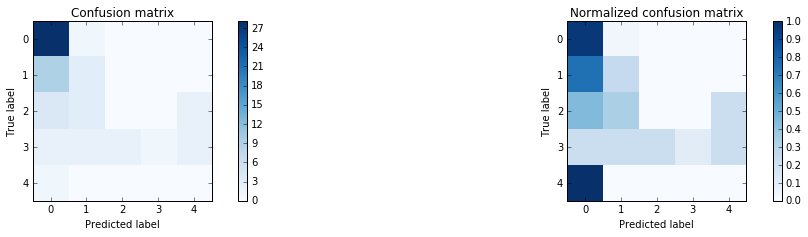

In [16]:
cm = confusion_matrix(y_deploy, y_pred_svm_linear)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on SVM

Confusion matrix, without normalization
[[27  2  0  0  0]
 [ 5  5  1  1  0]
 [ 6  1  2  0  0]
 [ 2  0  4  2  1]
 [ 0  0  0  1  0]]
Normalized confusion matrix
[[ 0.93  0.07  0.    0.    0.  ]
 [ 0.42  0.42  0.08  0.08  0.  ]
 [ 0.67  0.11  0.22  0.    0.  ]
 [ 0.22  0.    0.44  0.22  0.11]
 [ 0.    0.    0.    1.    0.  ]]


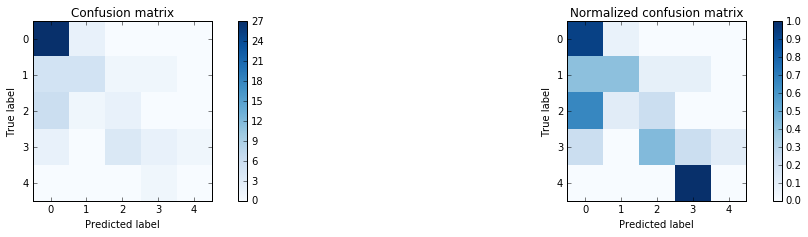

In [17]:
cm = confusion_matrix(y_deploy, y_pred_svm)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on DT with gini "CART"

Confusion matrix, without normalization
[[23  3  3  0  0]
 [ 7  3  1  1  0]
 [ 4  2  1  1  1]
 [ 0  3  2  2  2]
 [ 0  1  0  0  0]]
Normalized confusion matrix
[[ 0.79  0.1   0.1   0.    0.  ]
 [ 0.58  0.25  0.08  0.08  0.  ]
 [ 0.44  0.22  0.11  0.11  0.11]
 [ 0.    0.33  0.22  0.22  0.22]
 [ 0.    1.    0.    0.    0.  ]]


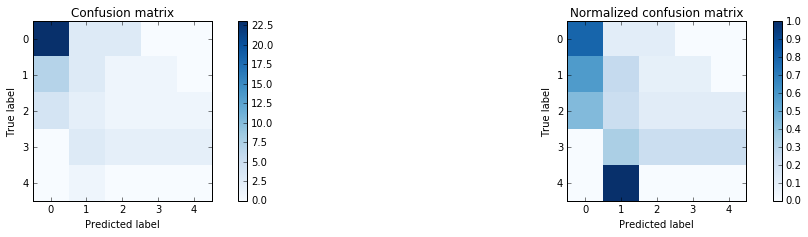

In [18]:
cm = confusion_matrix(y_deploy, y_pred_gtgini)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on DT with entory "C5.0"

Confusion matrix, without normalization
[[23  5  1  0  0]
 [ 8  4  0  0  0]
 [ 6  0  3  0  0]
 [ 1  2  3  1  2]
 [ 1  0  0  0  0]]
Normalized confusion matrix
[[ 0.79  0.17  0.03  0.    0.  ]
 [ 0.67  0.33  0.    0.    0.  ]
 [ 0.67  0.    0.33  0.    0.  ]
 [ 0.11  0.22  0.33  0.11  0.22]
 [ 1.    0.    0.    0.    0.  ]]


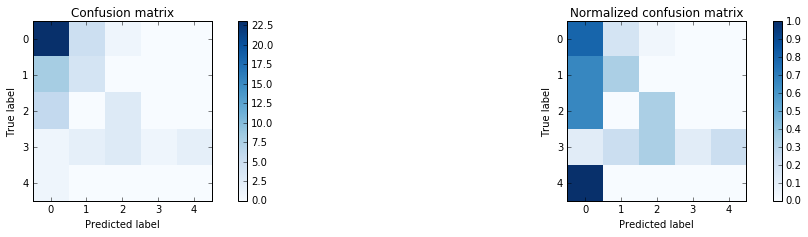

In [19]:
cm = confusion_matrix(y_deploy, y_pred_dt_IG)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Bagging with Knn

Confusion matrix, without normalization
[[28  0  1  0  0]
 [ 9  1  1  1  0]
 [ 7  1  1  0  0]
 [ 2  2  4  1  0]
 [ 1  0  0  0  0]]
Normalized confusion matrix
[[ 0.97  0.    0.03  0.    0.  ]
 [ 0.75  0.08  0.08  0.08  0.  ]
 [ 0.78  0.11  0.11  0.    0.  ]
 [ 0.22  0.22  0.44  0.11  0.  ]
 [ 1.    0.    0.    0.    0.  ]]


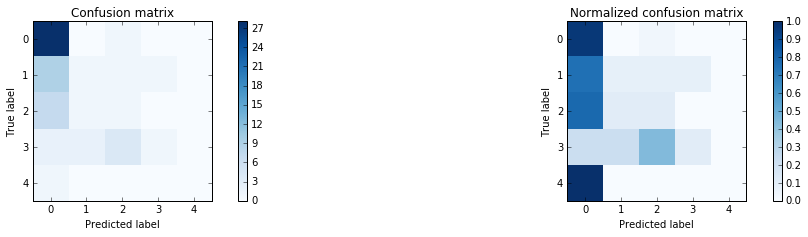

In [20]:
cm = confusion_matrix(y_deploy, y_pred_dt_BGKN)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Bagging with DT "CART"

Confusion matrix, without normalization
[[28  1  0  0  0]
 [ 9  2  0  1  0]
 [ 6  2  1  0  0]
 [ 2  5  1  1  0]
 [ 1  0  0  0  0]]
Normalized confusion matrix
[[ 0.97  0.03  0.    0.    0.  ]
 [ 0.75  0.17  0.    0.08  0.  ]
 [ 0.67  0.22  0.11  0.    0.  ]
 [ 0.22  0.56  0.11  0.11  0.  ]
 [ 1.    0.    0.    0.    0.  ]]


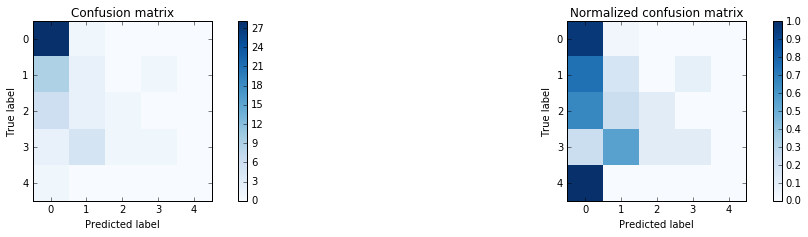

In [21]:
cm = confusion_matrix(y_deploy, y_pred_dt_BGDT)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Random Forest

Confusion matrix, without normalization
[[26  2  1  0  0]
 [ 7  2  1  2  0]
 [ 6  1  2  0  0]
 [ 2  3  3  0  1]
 [ 0  0  0  1  0]]
Normalized confusion matrix
[[ 0.9   0.07  0.03  0.    0.  ]
 [ 0.58  0.17  0.08  0.17  0.  ]
 [ 0.67  0.11  0.22  0.    0.  ]
 [ 0.22  0.33  0.33  0.    0.11]
 [ 0.    0.    0.    1.    0.  ]]


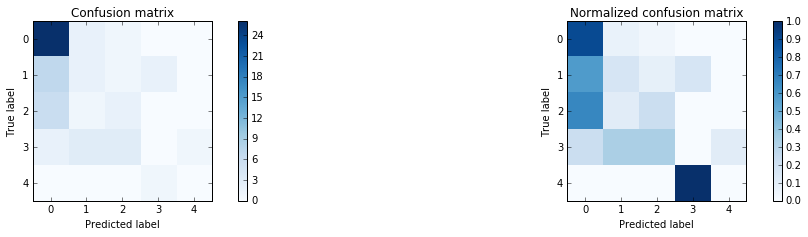

In [22]:
cm = confusion_matrix(y_deploy, y_pred_dt_RF)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Ada Boost

Confusion matrix, without normalization
[[24  5  0  0  0]
 [ 4  5  3  0  0]
 [ 3  2  3  1  0]
 [ 1  6  1  0  1]
 [ 0  1  0  0  0]]
Normalized confusion matrix
[[ 0.83  0.17  0.    0.    0.  ]
 [ 0.33  0.42  0.25  0.    0.  ]
 [ 0.33  0.22  0.33  0.11  0.  ]
 [ 0.11  0.67  0.11  0.    0.11]
 [ 0.    1.    0.    0.    0.  ]]


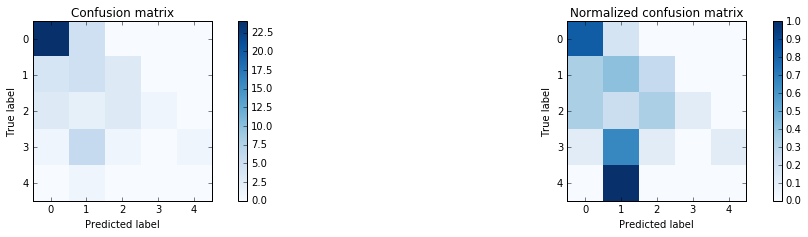

In [23]:
cm = confusion_matrix(y_deploy, y_pred_dt_AD)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Naive Bayes


Confusion matrix, without normalization
[[21  3  0  0  5]
 [ 4  1  0  0  7]
 [ 2  2  0  0  5]
 [ 0  1  2  0  6]
 [ 0  1  0  0  0]]
Normalized confusion matrix
[[ 0.72  0.1   0.    0.    0.17]
 [ 0.33  0.08  0.    0.    0.58]
 [ 0.22  0.22  0.    0.    0.56]
 [ 0.    0.11  0.22  0.    0.67]
 [ 0.    1.    0.    0.    0.  ]]


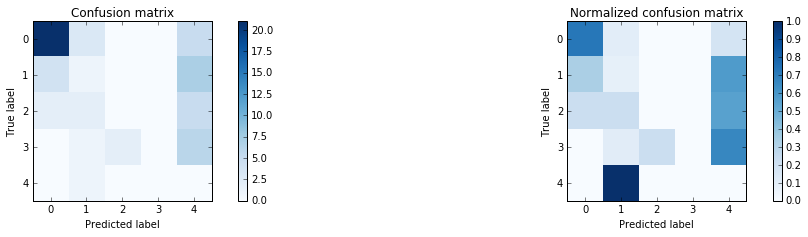

In [24]:
cm = confusion_matrix(y_deploy, y_pred_NB)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on LDA

Confusion matrix, without normalization
[[27  1  1  0  0]
 [ 6  4  1  1  0]
 [ 3  3  1  0  2]
 [ 0  2  4  1  2]
 [ 1  0  0  0  0]]
Normalized confusion matrix
[[ 0.93  0.03  0.03  0.    0.  ]
 [ 0.5   0.33  0.08  0.08  0.  ]
 [ 0.33  0.33  0.11  0.    0.22]
 [ 0.    0.22  0.44  0.11  0.22]
 [ 1.    0.    0.    0.    0.  ]]


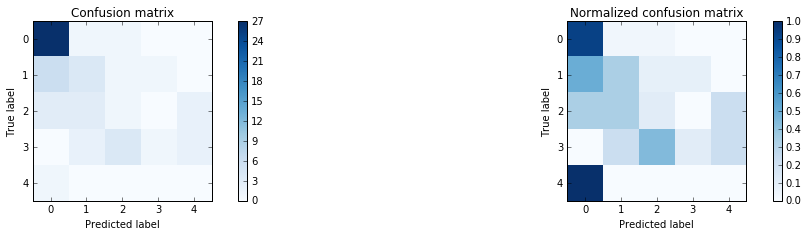

In [25]:
cm = confusion_matrix(y_deploy, y_pred_dt_LDA)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on QDA

Confusion matrix, without normalization
[[21  6  2  0  0]
 [ 7  3  0  2  0]
 [ 5  2  2  0  0]
 [ 3  3  3  0  0]
 [ 0  1  0  0  0]]
Normalized confusion matrix
[[ 0.72  0.21  0.07  0.    0.  ]
 [ 0.58  0.25  0.    0.17  0.  ]
 [ 0.56  0.22  0.22  0.    0.  ]
 [ 0.33  0.33  0.33  0.    0.  ]
 [ 0.    1.    0.    0.    0.  ]]


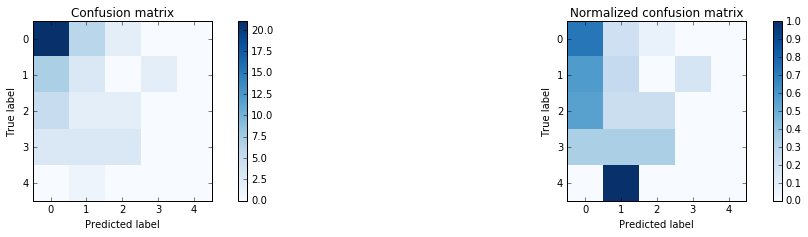

In [26]:
cm = confusion_matrix(y_deploy, y_pred_dt_QDA)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on NN


Confusion matrix, without normalization
[[26  2  1  0  0]
 [ 7  3  2  0  0]
 [ 3  4  2  0  0]
 [ 1  4  2  2  0]
 [ 1  0  0  0  0]]
Normalized confusion matrix
[[ 0.9   0.07  0.03  0.    0.  ]
 [ 0.58  0.25  0.17  0.    0.  ]
 [ 0.33  0.44  0.22  0.    0.  ]
 [ 0.11  0.44  0.22  0.22  0.  ]
 [ 1.    0.    0.    0.    0.  ]]


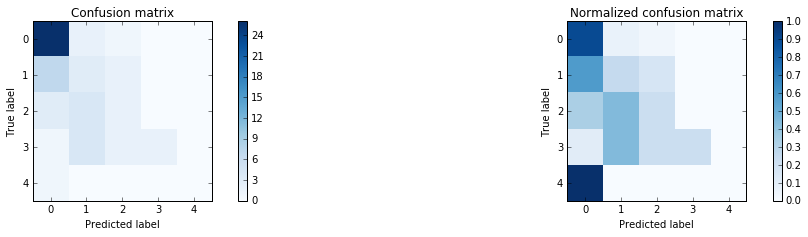

In [27]:
cm = confusion_matrix(y_deploy, y_pred_NN)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on NN 14.3% neurals removed

Confusion matrix, without normalization
[[25  4  0  0  0]
 [ 7  5  0  0  0]
 [ 2  2  4  1  0]
 [ 0  2  3  3  1]
 [ 1  0  0  0  0]]
Normalized confusion matrix
[[ 0.86  0.14  0.    0.    0.  ]
 [ 0.58  0.42  0.    0.    0.  ]
 [ 0.22  0.22  0.44  0.11  0.  ]
 [ 0.    0.22  0.33  0.33  0.11]
 [ 1.    0.    0.    0.    0.  ]]


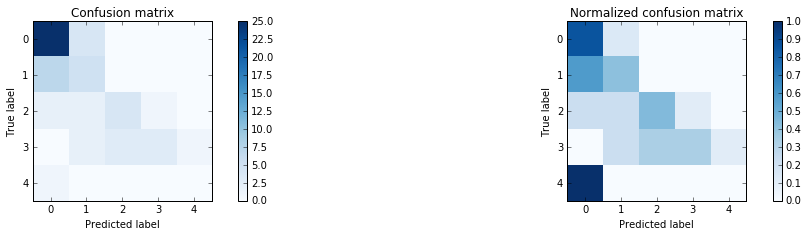

In [28]:
cm = confusion_matrix(y_deploy, y_pred_NN1)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on NN 28.6% neurals removed


Confusion matrix, without normalization
[[26  3  0  0  0]
 [ 6  5  0  1  0]
 [ 2  4  3  0  0]
 [ 1  2  2  3  1]
 [ 1  0  0  0  0]]
Normalized confusion matrix
[[ 0.9   0.1   0.    0.    0.  ]
 [ 0.5   0.42  0.    0.08  0.  ]
 [ 0.22  0.44  0.33  0.    0.  ]
 [ 0.11  0.22  0.22  0.33  0.11]
 [ 1.    0.    0.    0.    0.  ]]


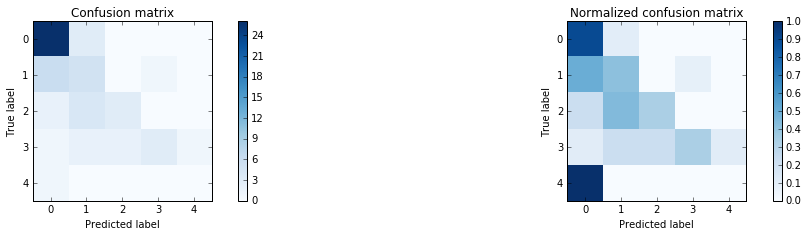

In [29]:
cm = confusion_matrix(y_deploy, y_pred_NN2)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

##Compute Confusion on NN 82.9% neurals removed

Confusion matrix, without normalization
[[26  3  0  0  0]
 [ 6  6  0  0  0]
 [ 5  4  0  0  0]
 [ 3  5  0  1  0]
 [ 1  0  0  0  0]]
Normalized confusion matrix
[[ 0.9   0.1   0.    0.    0.  ]
 [ 0.5   0.5   0.    0.    0.  ]
 [ 0.56  0.44  0.    0.    0.  ]
 [ 0.33  0.56  0.    0.11  0.  ]
 [ 1.    0.    0.    0.    0.  ]]


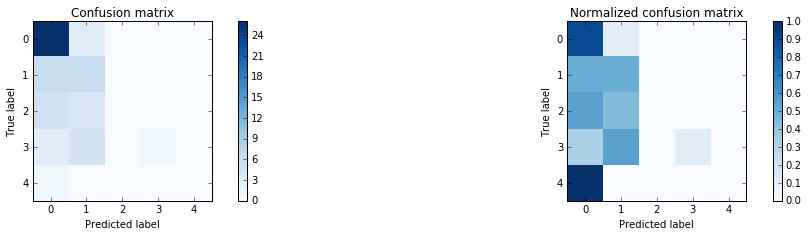

In [30]:
cm = confusion_matrix(y_deploy, y_pred_NN3)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()